In [9]:
import jax.numpy as jnp
import jax
import os

jax.config.update('jax_default_device',jax.devices()[1])
jax.config.update('jax_enable_x64',True)

from jsindy.trajectory_model import DataAdaptedRKHSInterpolant
from jsindy.sindy_model import JSINDyModel
from jsindy.dynamics_model import FeatureLinearModel
from jsindy.optim import LMSolver

from equinox import tree_pprint
import matplotlib.pyplot as plt

In [2]:
t = jnp.linspace(0,10,50)
x = jnp.vstack(
    [jnp.cos(4*t),jnp.sin(4*t)]
).T


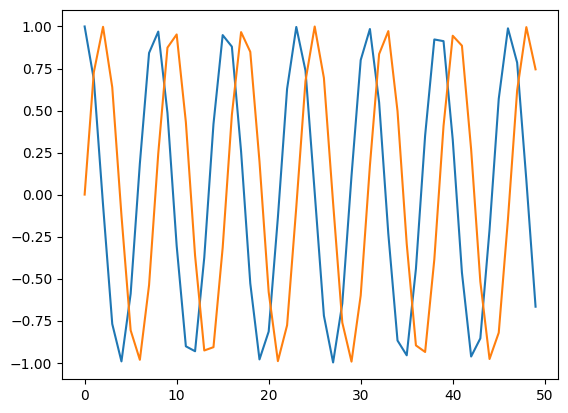

In [4]:
plt.plot(x)
plt.show()

In [5]:
traj_model = DataAdaptedRKHSInterpolant()
dynamics_model = FeatureLinearModel()

In [10]:
model = JSINDyModel(
    traj_model,
    dynamics_model,
    optimizer=LMSolver()
    )

In [11]:
params = model.initialize_fit(t,x)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Restart 1
Restart 2


In [12]:
model.fit(t,x)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Restart 1


KeyError: 'init_params'

In [ ]:
model.print()